# Data preprocessing

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import pickle

In [125]:
data = pd.read_csv('C:/Users/rohan/Downloads/hospi/hospi/data/diabetic_data.csv')

In [126]:
data.shape

(101766, 50)

In [127]:
data.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [129]:
data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [130]:
data.replace('?', np.NaN, inplace=True)

In [131]:
data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [208]:
data.nunique()

race                          5
gender                        2
age                          10
admission_type_id             4
discharge_disposition_id     10
admission_source_id           6
time_in_hospital             14
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             20
diag_1                        9
diag_2                        9
diag_3                        9
number_diagnoses             14
max_glu_serum                 3
A1Cresult                     3
metformin                     2
repaglinide                   2
glimepiride                   2
glipizide                     2
glyburide                     2
pioglitazone                  2
rosiglitazone                 2
insulin                       2
change                        2
diabetesMed                   2
readmitted                    2
dtype: int64

In [212]:
data.shape

(98052, 30)

In [132]:
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [213]:
data = data[data['gender']!='Unknown/Invalid']

In [214]:
cols_to_drop = ['weight', 'payer_code','medical_specialty','encounter_id','patient_nbr','examide','citoglipton']

In [136]:
data.shape

(101763, 43)

In [216]:
data.dropna(how='any',axis=0,inplace=True)

In [217]:
data.shape

(98052, 30)

In [139]:
data.reset_index(drop=True)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
98048,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
98049,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
98050,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [140]:
data.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [218]:
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

In [219]:
data['diabetesMed'].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

# Data Visualization

### Univariate

<AxesSubplot:>

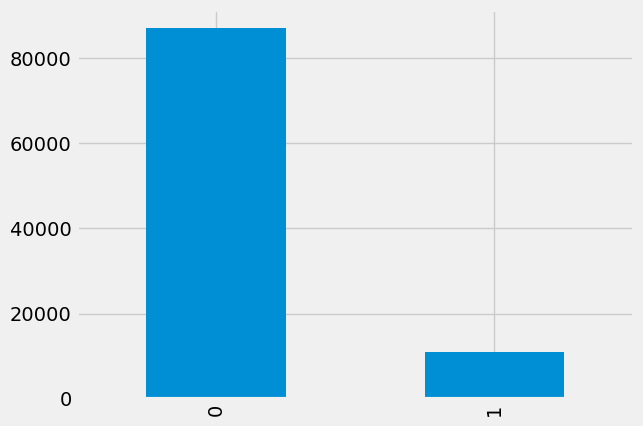

In [143]:
data['readmitted'].value_counts().plot(kind='bar')

### Bivariate

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

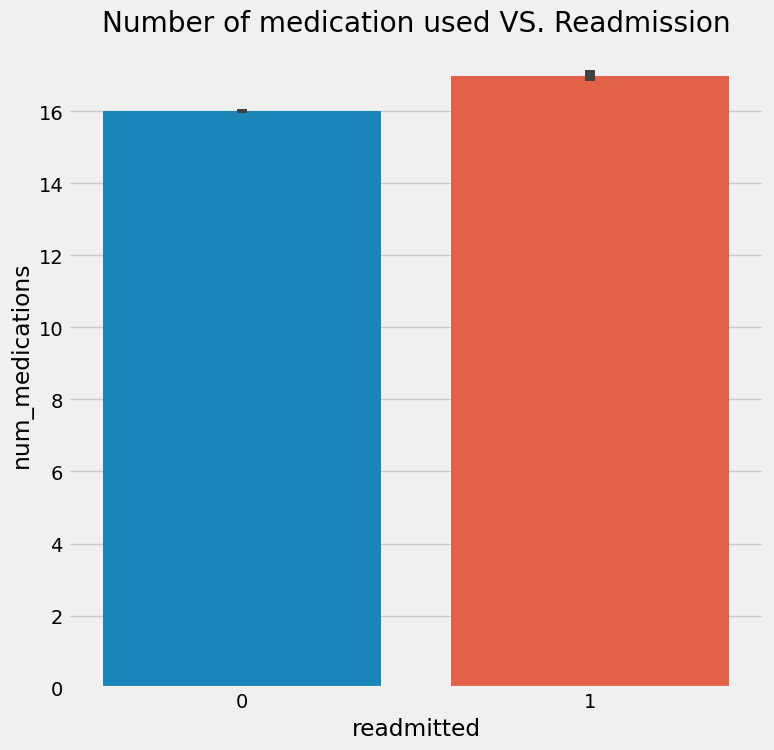

In [144]:
fig = plt.figure(figsize=(8,8))
sb.barplot(x = data['readmitted'], y = data['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

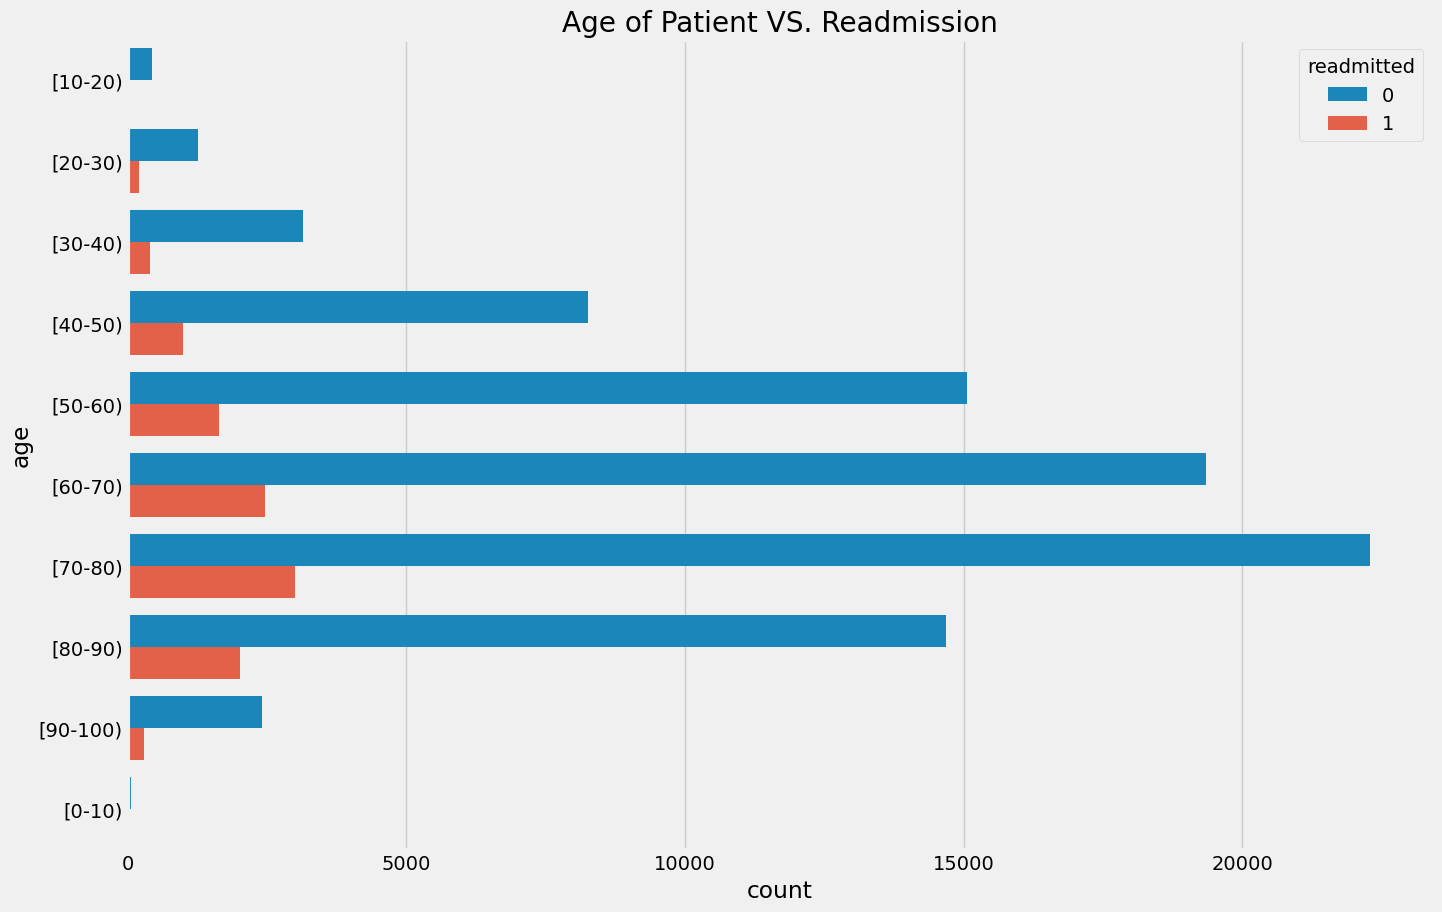

In [145]:
fig = plt.figure(figsize=(15,10))
sb.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

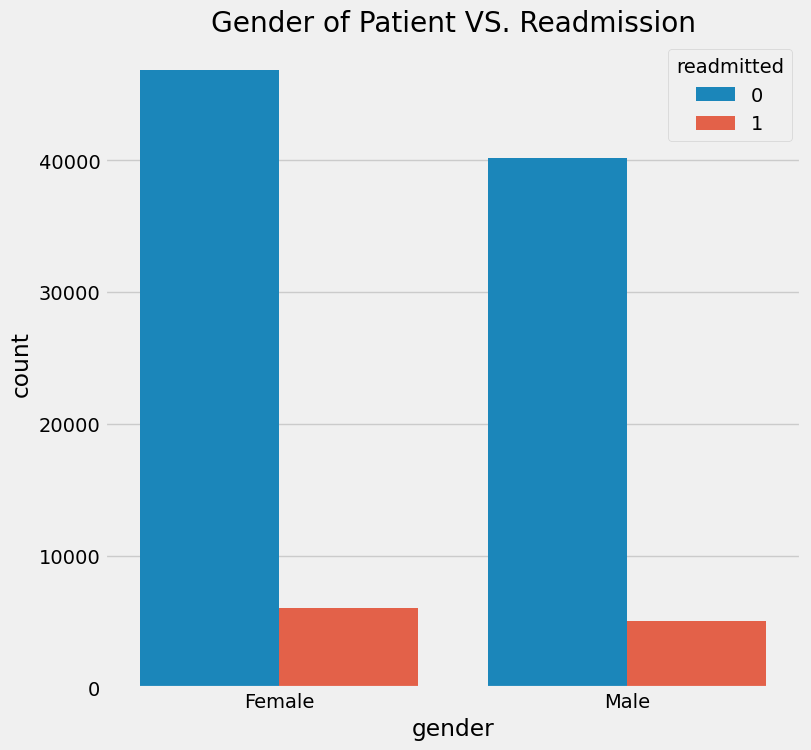

In [146]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['gender'], hue = data['readmitted']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

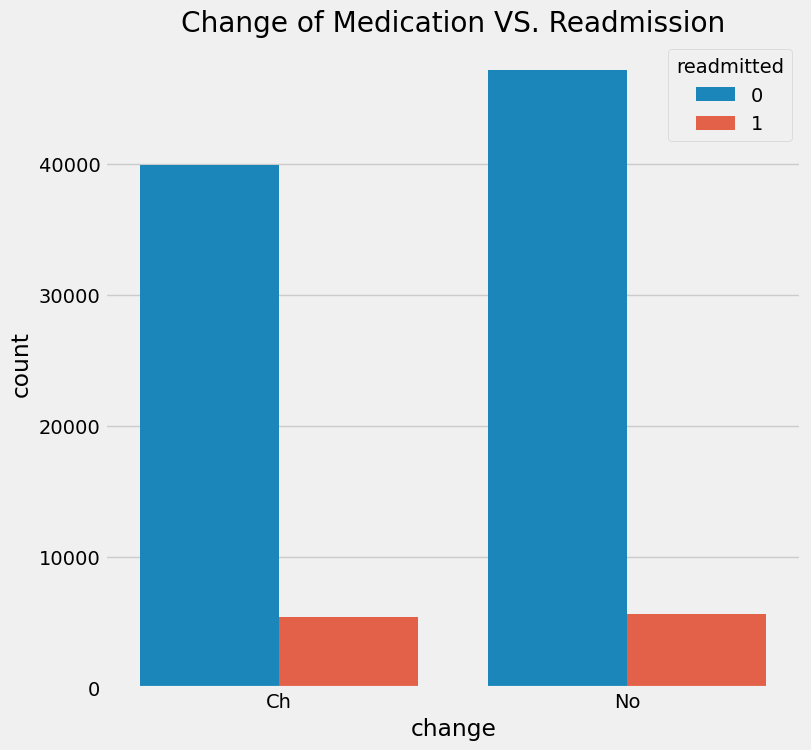

In [147]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['change'], hue = data['readmitted']).set_title('Change of Medication VS. Readmission')

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

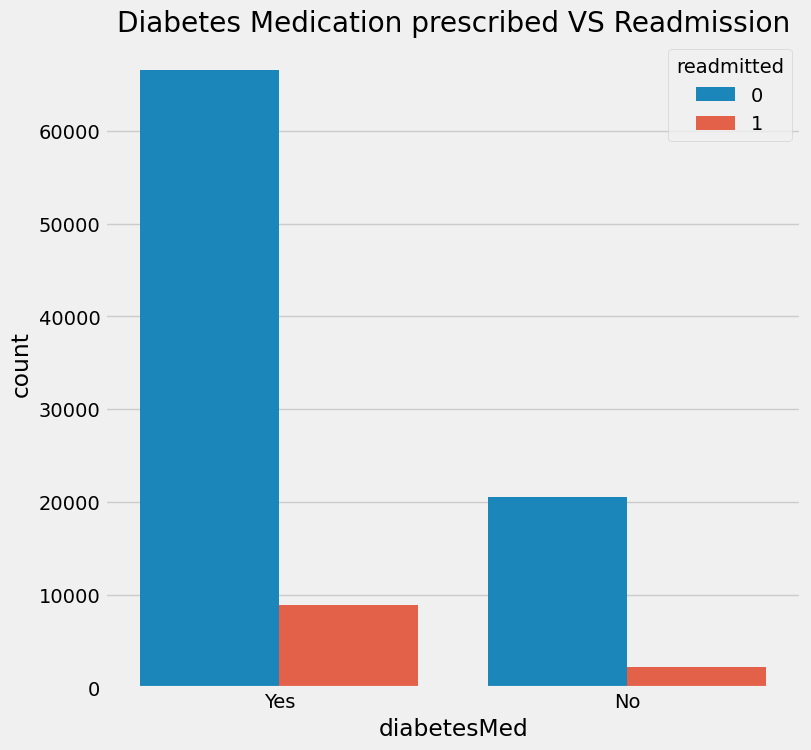

In [148]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['diabetesMed'], hue = data['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Glucose serum test result VS. Readmission')

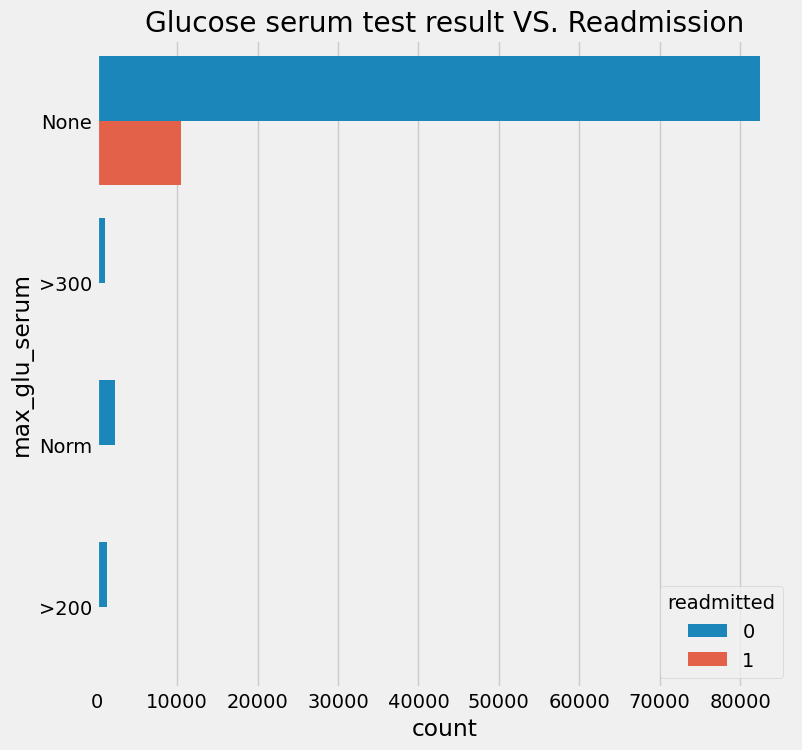

In [149]:
fig = plt.figure(figsize=(8,8))
sb.countplot(y = data['max_glu_serum'], hue = data['readmitted']).set_title('Glucose serum test result VS. Readmission')

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

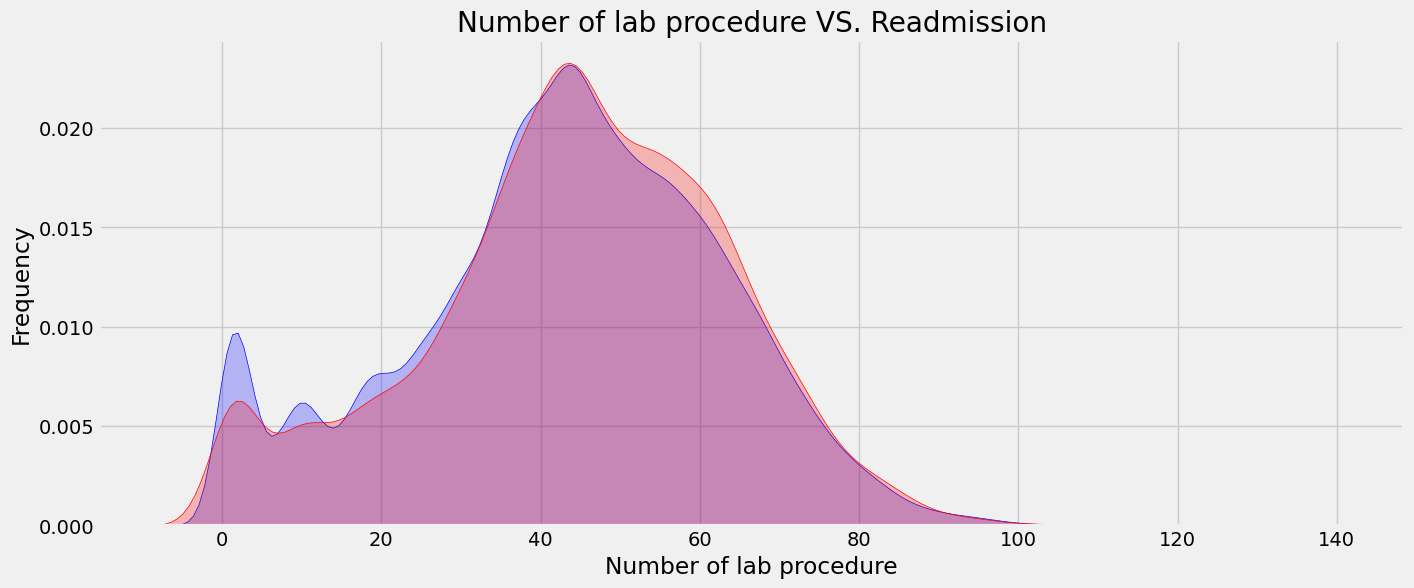

In [150]:
fig = plt.figure(figsize=(15,6),)
ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

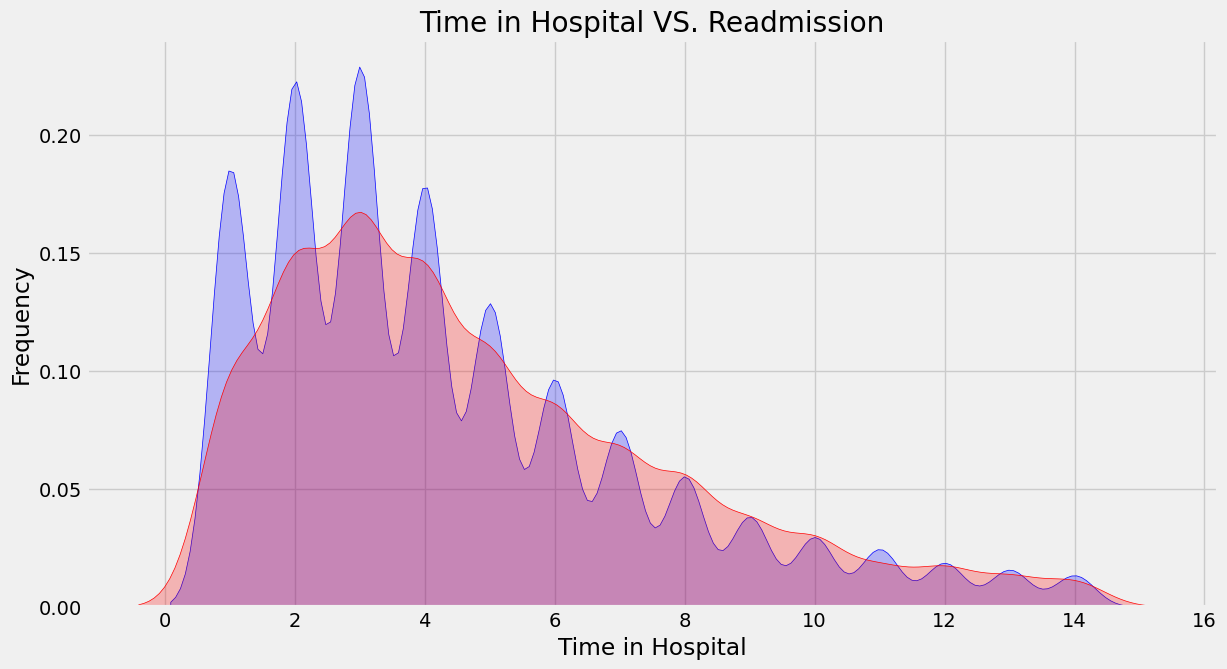

In [151]:
fig = plt.figure(figsize=(13,7),)
ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

### Descriptive

In [152]:
data.describe(include='all')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,98052,98052,98052,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,...,98052,98052,98052,98052,98052,98052,98052,98052,98052,98052.000000
unique,5,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,4,4,2,2,1,2,2,2,NaN
top,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,75079,52833,25305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98015,45942,97383,98039,98051,98052,98051,52774,75350,NaN
mean,NaN,NaN,NaN,2.025803,3.753396,5.776741,4.422011,43.148462,1.350712,16.119590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112858
std,NaN,NaN,NaN,1.450121,5.309412,4.071632,2.993070,19.711757,1.708475,8.108496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.316421
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [153]:
data = data.replace({'admission_type_id':{2:1,7:1,6:5,8:5}, 'discharge_disposition_id':{6:1,8:1,9:1,13:1,3:2,4:2,5:2,
                    14:2,22:2,23:2,24:2,12:10,15:10,16:10,17:10,25:18,26:18}, 'admission_source_id':{2:1,3:1,5:4,6:4,
                    10:4,22:4,25:4,15:9,17:9,20:9,21:9,13:11,14:11}})

In [154]:
drugs = ['metformin', 'repaglinide', 'glimepiride', 'glipizide',
                'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
drugs_to_drop =["nateglinide", "chlorpropamide", "acetohexamide", "tolbutamide",
             "acarbose", "miglitol", "troglitazone", "tolazamide", "glyburide-metformin", 
                "glipizide-metformin","glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]

In [155]:
for col in drugs:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1)

In [156]:
data.drop(drugs_to_drop, axis=1,inplace=True)

In [157]:
data['A1Cresult'].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [158]:
data['max_glu_serum'].value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [159]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)

data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -99)

In [160]:
data['age'].value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [161]:
for i in range(0,10):
    data['age'] = data['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (10*i+10*(i+1))//2)
data['age'].value_counts()

75    25305
65    21809
85    16702
55    16697
45     9265
35     3548
95     2717
25     1478
15      466
5        65
Name: age, dtype: int64

In [162]:
def conv_diag(icd9):
    try:
        n = float(icd9)
        if (n>=390 and n<=459) or (n==785):
            return "circulatory" 
        elif (n>=520 and n<=579) or (n==787):
            return "digestive"
        elif (n>=580 and n<=629) or (n==788):
            return "genitourinary"
        elif np.trunc(n)==250:
            return "diabetes"
        elif (n>=800 and n<=999):
            return "injury"
        elif (n>=710 and n<=739):
            return "musculoskeletal"
        elif (n>140 and n<=239):
            return "neoplasms"
        elif (n>=460 and n<=519) or (n==786):
            return "respiratory"
        else :
            return "other"
    except:
        return "other"

In [163]:
data['diag_1'] = data['diag_1'].apply(conv_diag)
data['diag_2'] = data['diag_2'].apply(conv_diag)
data['diag_3'] = data['diag_3'].apply(conv_diag)

In [164]:
data.head().T

,1,2,3,4,5
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male
age,15,25,35,45,55
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31
num_procedures,0,5,1,0,6
num_medications,18,13,16,8,16


In [165]:
data.reset_index(drop=True)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,15,1,1,7,3,59,0,18,...,0,0,0,0,0,0,1,Ch,Yes,0
1,AfricanAmerican,Female,25,1,1,7,2,11,5,13,...,0,0,1,0,0,0,0,No,Yes,0
2,Caucasian,Male,35,1,1,7,2,44,1,16,...,0,0,0,0,0,0,1,Ch,Yes,0
3,Caucasian,Male,45,1,1,7,1,51,0,8,...,0,0,1,0,0,0,1,Ch,Yes,0
4,Caucasian,Male,55,1,1,1,3,31,6,16,...,0,0,0,0,0,0,1,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,AfricanAmerican,Male,75,1,2,7,3,51,0,16,...,0,0,0,0,0,0,1,Ch,Yes,0
98048,AfricanAmerican,Female,85,1,2,4,5,33,3,18,...,0,0,0,0,0,0,1,No,Yes,0
98049,Caucasian,Male,75,1,1,7,1,53,0,9,...,0,0,0,0,0,0,1,Ch,Yes,0
98050,Caucasian,Female,85,1,2,7,10,45,2,21,...,0,0,1,0,1,0,1,Ch,Yes,0


In [166]:
data.describe()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,readmitted
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,...,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,66.260250,1.783747,2.248144,5.155591,4.422011,43.148462,1.350712,16.119590,0.376382,0.202464,...,-82.534798,0.196273,0.015533,0.050861,0.125270,0.104649,0.072380,0.062885,0.531453,0.112858
std,15.590805,1.333516,3.889258,2.873250,2.993070,19.711757,1.708475,8.108496,1.283365,0.942897,...,37.020675,0.397180,0.123659,0.219714,0.331027,0.306102,0.259117,0.242757,0.499012,0.316421
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,...,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,...,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,75.000000,3.000000,2.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,...,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,5.000000,28.000000,11.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
X = data.drop('readmitted', axis = 1)
y = data['readmitted']

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [169]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),['diag_1','diag_2','diag_3','race','change','gender','diabetesMed'])]
                        ,remainder='passthrough')

In [170]:
X = ct.fit_transform(X)

In [171]:
X

array([[7., 1., 7., ..., 0., 0., 1.],
       [7., 1., 7., ..., 0., 0., 0.],
       [7., 1., 0., ..., 0., 0., 1.],
       ...,
       [7., 3., 7., ..., 0., 0., 1.],
       [4., 7., 4., ..., 1., 0., 1.],
       [2., 2., 2., ..., 0., 0., 0.]])

# Model Building

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.3,random_state=20)

In [256]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((68636, 29), (29416, 29), (68636,), (29416,))

In [257]:
from imblearn.over_sampling import SMOTE

In [258]:

sm = SMOTE(random_state = 20)
X1_res, y1_res = sm.fit_resample(X_train,y_train)

In [259]:
X1_res = np.array(X1_res)

In [260]:
y1_res = np.array(y1_res)

In [261]:

X_train, X_val, y_train, y_val = train_test_split(X1_res,y1_res,test_size=0.3, random_state=20)

In [262]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((85246, 29), (36534, 29), (85246,), (36534,))

In [263]:
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [264]:
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear',random_state=20)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=20)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=20)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=20)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=20)


In [265]:
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test,y_pred)
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    
    print()

In [266]:
for model_name,model in model_dict.items():
    model_test(X_train, X_val, y_train, y_val, model, model_name)

======================================Logistic regression=======================================
Score is : 0.6001806536377073

======================================KNN Classifier=======================================
Score is : 0.7935621612744292

======================================Decision Tree Classifier=======================================
Score is : 0.8801664203207971

======================================Random Forest Classifier=======================================
Score is : 0.938632506706082

======================================AdaBoost Classifier=======================================
Score is : 0.9139158044561231

======================================Gradient Boosting Classifier=======================================
Score is : 0.9317621941205453



In [267]:
for model_name, model in model_dict.items():
    p = model.predict(X_test)
    print('Testing accuracy of ',model_name,'=',accuracy_score(y_test,p))

Testing accuracy of  Logistic regression = 0.6484226271416916
Testing accuracy of  KNN Classifier = 0.5848517813434866
Testing accuracy of  Decision Tree Classifier = 0.7861028011966277
Testing accuracy of  Random Forest Classifier = 0.8871702474843622
Testing accuracy of  AdaBoost Classifier = 0.8744220832200164
Testing accuracy of  Gradient Boosting Classifier = 0.8873742181125918


In [269]:
rfc=RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_val)
print('Training accuracy of random forest=',accuracy_score(y_test,p))

Training accuracy of random forest= 0.8873742181125918


Text(21.78333333333333, 0.5, 'Actual')

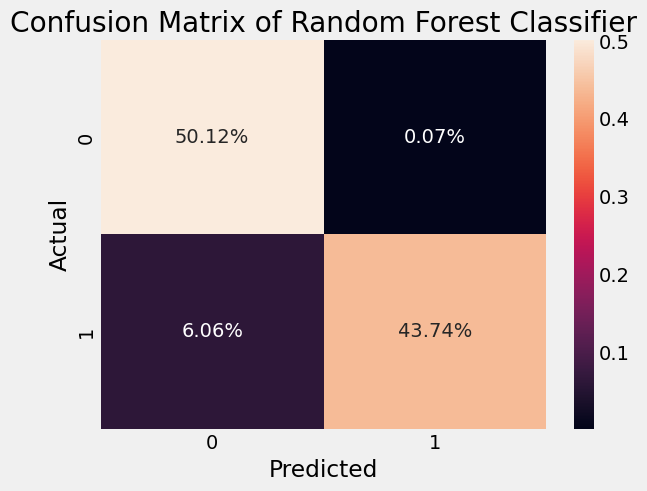

In [270]:
cf_matrix = confusion_matrix(y_val, pred_rfc
                            )
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

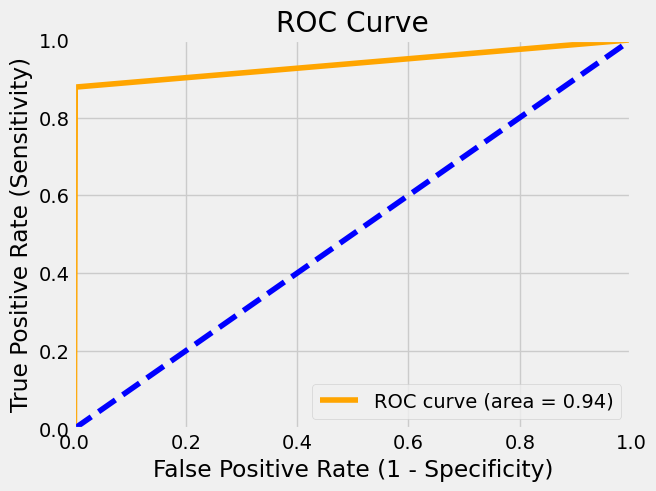

(array([0.        , 0.00147235, 1.        ]),
 array([0.        , 0.87826995, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [271]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_val, pred_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_val, pred_rfc)

In [272]:
print(classification_report(y_val,pred_rfc))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18338
           1       1.00      0.88      0.93     18196

    accuracy                           0.94     36534
   macro avg       0.95      0.94      0.94     36534
weighted avg       0.94      0.94      0.94     36534



In [273]:
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_val)
print('Training Accuracy of Random Forest=',accuracy_score(y_val,pred_rfc))

Training Accuracy of Random Forest= 0.938632506706082


In [274]:
cols = list(data.columns)
cols.remove('readmitted')

Feature: 0, Score: 0.02612
Feature: 1, Score: 0.02665
Feature: 2, Score: 0.02879
Feature: 3, Score: 0.02301
Feature: 4, Score: 0.07155
Feature: 5, Score: 0.08739
Feature: 6, Score: 0.05176
Feature: 7, Score: 0.02156
Feature: 8, Score: 0.01079
Feature: 9, Score: 0.07860
Feature: 10, Score: 0.01159
Feature: 11, Score: 0.03947
Feature: 12, Score: 0.03854
Feature: 13, Score: 0.03565
Feature: 14, Score: 0.03560
Feature: 15, Score: 0.01888
Feature: 16, Score: 0.02385
Feature: 17, Score: 0.14236
Feature: 18, Score: 0.02681
Feature: 19, Score: 0.00295
Feature: 20, Score: 0.00651
Feature: 21, Score: 0.05393
Feature: 22, Score: 0.00209
Feature: 23, Score: 0.00441
Feature: 24, Score: 0.02454
Feature: 25, Score: 0.01401
Feature: 26, Score: 0.00689
Feature: 27, Score: 0.00687
Feature: 28, Score: 0.07883
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 

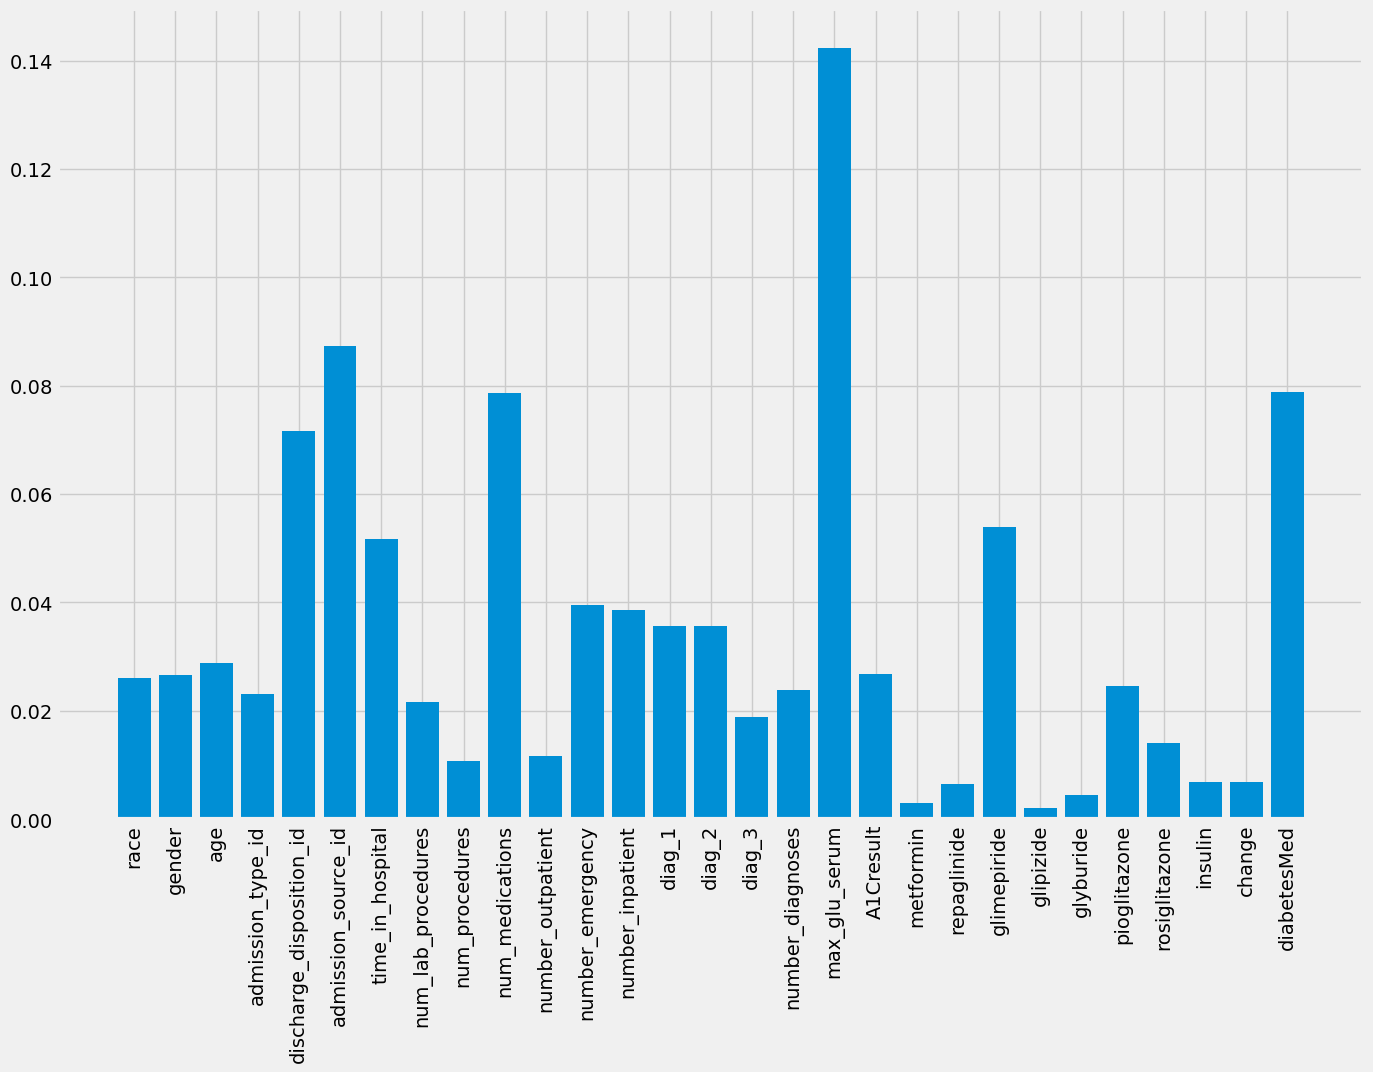

In [275]:
importance = rfc.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
print(cols)
plt.figure(figsize=(15,10))
plt.bar([cols[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

In [276]:
p = rfc.predict(X_test)
print('Testing Accuracy of Random Forest: ',accuracy_score(y_test,p))

Testing Accuracy of Random Forest:  0.8871702474843622


In [279]:
rfc.predict([[  8.,   1.,   1.,   1.,   7.,   4.,  24.,   0.,   4.,   1.,3.,4.,5.,   0.,4.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.,16.,17.,18.,19.]])

array([1], dtype=int64)

In [280]:
imp_cols = []
for i,v in enumerate(importance):
    if (v>0.035):
        imp_cols.append(cols[i])

In [281]:
imp_cols

['discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_medications',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'max_glu_serum',
 'glimepiride',
 'diabetesMed']

In [282]:
final_data = data[imp_cols+['readmitted']].copy()

In [283]:
final_data.shape

(98052, 12)

In [284]:
X1 = final_data.drop('readmitted', axis = 1)
y1 = final_data['readmitted']

In [285]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),['diag_1','diag_2','diabetesMed'])]
                        ,remainder='passthrough')

In [286]:
X1.shape, y1.shape

((98052, 11), (98052,))

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                    stratify=y1, 
                                                    test_size=0.3, random_state=20)

In [288]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((68636, 11), (29416, 11), (68636,), (29416,))

In [289]:
X_test[20:40]

,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,number_emergency,number_inpatient,diag_1,diag_2,max_glu_serum,glimepiride,diabetesMed
78906,2,7,9,22,0,0,other,genitourinary,-99,0,Yes
11137,1,7,8,19,0,1,digestive,respiratory,-99,0,Yes
72049,1,7,2,20,0,0,circulatory,circulatory,-99,0,Yes
68519,1,7,4,24,0,4,respiratory,diabetes,1,0,Yes
40887,1,7,3,18,0,2,circulatory,circulatory,-99,0,Yes
26564,1,7,6,10,0,0,injury,genitourinary,-99,0,Yes
45104,1,7,1,14,0,0,respiratory,digestive,-99,0,Yes
71384,1,7,4,14,0,1,genitourinary,circulatory,-99,0,Yes
96221,1,1,5,24,0,0,respiratory,respiratory,-99,0,No
38217,1,1,1,13,0,0,circulatory,circulatory,-99,0,No


In [290]:
y_test[20:40]

78906    0
11137    0
72049    0
68519    1
40887    0
26564    0
45104    0
71384    1
96221    0
38217    0
16560    0
11887    0
47468    0
50327    0
11943    0
44765    1
89439    0
68035    0
71002    0
30218    0
Name: readmitted, dtype: int64

In [291]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))

In [292]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [293]:
new = joblib.load('feature_values')

In [296]:
p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)